In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

Documentation: https://scikit-learn.org/stable/

In [2]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
type(cancer)

sklearn.utils._bunch.Bunch

In [4]:
list(cancer.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [5]:
cancer["data"] # Gives us numbers

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
cancer["feature_names"] # Gives us some feature names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# We can turn it into something we can use:
df = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
# Include binary target variable
df["malignant"] = cancer["target"]
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [9]:
# Q1) Get summary data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: xlabel='worst texture', ylabel='worst concave points'>

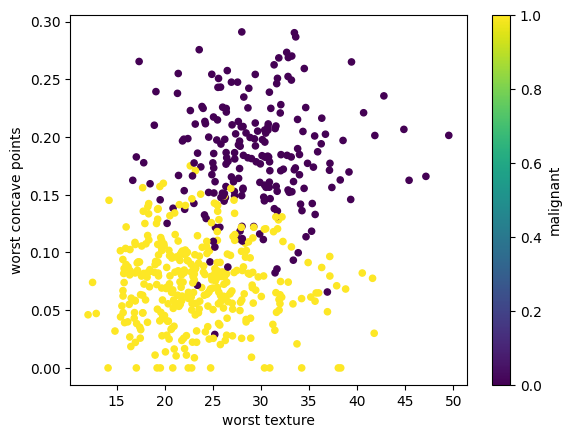

In [10]:
# Q2) Extract the two features:
features = ["worst texture", "worst concave points"]
feat_df = df[features]
# Tuple unrolling
df.plot.scatter(*features, c="malignant", colormap="viridis")
# Same as:
# df.plot.scatter("worst texture", "worst concave points", c="malignant", colormap="viridis")

#### Q3

- Scikit-learn (shortened to `sklearn`) is a python library of machine learning models and utilities.
- It's a huge library with extensive functionality, most of which won't be presented here (but can be discovered by you!)
    - READ THE DOCS 
- Most `sklearn` model workflows are separated into three steps:
    1. Create the model (as you would any other object)
    2. Fit the model with `.fit()`
        - Fits internal parameters of the model to the given data.
        - Just like estimation of OLS parameters in econometrics.   
    3. Transform data with `.transform()`
        - Fitting the model changes its internals, but doesn't do anything to the data.
        - If you want to "use" the model, you need to give it data that will be transformed.
        - Just like predicting outputs **after** estimating OLS parameters.
- Still, note that different models have different options and different behaviour for the above.
- Also, while these three steps are common to the great majority of models, they differ significantly on their internals.
    - Model object parameters contain fitted values (after calling `.fit()`.
    - Methods can help with other tasks (such as prediction and statistics).

In [11]:
# Q4) Split the data into a 70-30 training-test subset
x_train, x_test, y_train, y_test = train_test_split(feat_df, df["malignant"],
                                                    test_size=0.3)

We should standerdize the x training and test datasets since many models 
(especially distance based-algorithms like KNN) might yield biased estimates
and thus biased predictions otherwise.

It can also improve training speed and stability for other models, like neural networks.

In [12]:
# Stage 1
scaler = preprocessing.StandardScaler()

# Stage 2
scaler.fit(x_train)

# Stage 3
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
# Q5) Test out models

def test_model(x_train, y_train, x_test, y_test, model_type, model_opts, plot_cm=False):
    
    # this is dict unrolling (just like with tuples, above)
    model = model_type(**model_opts)
    model.fit(x_train, y_train)

    res = dict()

    res["model"] = model
    
    res["score"] = model.score(x_test, y_test)
    
    cm = confusion_matrix(y_test, model.predict(x_test))
    disp = ConfusionMatrixDisplay(cm, display_labels=None)
    res["disp"] = disp
    if plot_cm: disp.plot()
        
    res["df"] = pd.DataFrame(
        cm, 
        index=["Actual Negative", "Actual Positive"], 
        columns=["Predicted Negative", "Predicted Positive"]
    )
    
    # False Positivity: False Positives / All Actual Negatives
    res["false_pos_rate"] = cm[0, 1]/cm[0].sum()    
    # Recall: True Positives / All Positives
    res["recall_rate"] = cm[1, 1]/cm[1].sum()

    return res

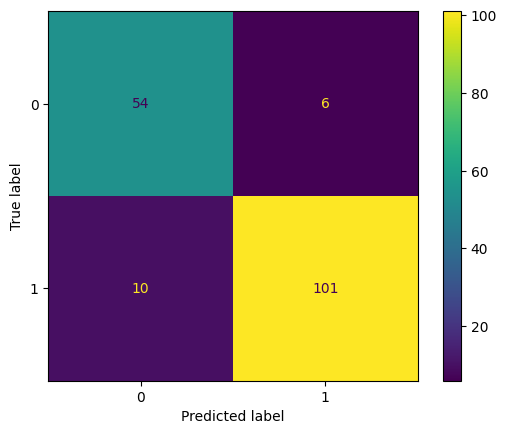

In [14]:
res = test_model(x_train_scaled, y_train, x_test_scaled, y_test, 
                 KNeighborsClassifier, {"n_neighbors": 1}, plot_cm=True)

In [15]:
models = [
    *[(KNeighborsClassifier, {"n_neighbors": n}) for n in [1, 3, 5]], 
    (LogisticRegression, {}),
    (GaussianNB, {})
]

# Save the scores, false positive rates, and recall rates for all models:
comp_res = {
    "Name": list(),
    "Score": list(), 
    "False Positive Rate": list(), 
    "Recall Rate": list(),
}

trained_models = dict()

for model, model_opts in models:
    
    res = test_model(x_train_scaled, y_train, x_test_scaled, y_test, 
                     model, model_opts)

    comp_res["Name"].append(model.__name__ + '; '.join([str(v) for v in model_opts.values()]))
    comp_res["Score"].append(res["score"])
    comp_res["False Positive Rate"].append(res["false_pos_rate"])
    comp_res["Recall Rate"].append(res["recall_rate"])

    trained_models[comp_res["Name"][-1]] = res["model"]

In [16]:
##### Q 6)
# To compare them, let's set up a dataframe, like so:
pd.DataFrame(comp_res).set_index("Name")

,Score,False Positive Rate,Recall Rate
Name,,,
KNeighborsClassifier1,0.906433,0.100000,0.909910
KNeighborsClassifier3,0.935673,0.083333,0.945946
KNeighborsClassifier5,0.923977,0.133333,0.954955
LogisticRegression,0.918129,0.100000,0.927928
GaussianNB,0.923977,0.100000,0.936937


In [17]:
##### Q 7)
feat_df_scaled = scaler.transform(feat_df)
cross_val_scores = cross_val_score(trained_models["LogisticRegression"], 
                                   feat_df_scaled, df["malignant"], 
                                   cv=5)

In [18]:
cross_val_mean = cross_val_scores.mean()
cross_val_mean

0.9104021114733737

In [19]:
cross_val_std = cross_val_scores.std()
cross_val_std

0.025572095346730685